**CODSOFT DATA SCIENCE INTERNSHIP**

**Task-4 SALES PREDICTION USING PYTHON**

This project focuses on building a machine learning model to predict sales based on various influencing features. Using Python, the dataset was analyzed, cleaned, and visualized to understand key patterns and trends. Machine learning algorithms were then applied to forecast sales values, helping demonstrate how predictive analytics can support business decision-making.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
import pandas as pd

df = pd.read_csv("advertising.csv")

print("Shape:", df.shape)
display(df.head())

print("\nInfo:")
display(df.info())

print("\nMissing values per column:")
display(df.isnull().sum())

print("\nNumeric summary:")
display(df.describe())


Shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None


Missing values per column:


,0
TV,0
Radio,0
Newspaper,0
Sales,0



Numeric summary:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


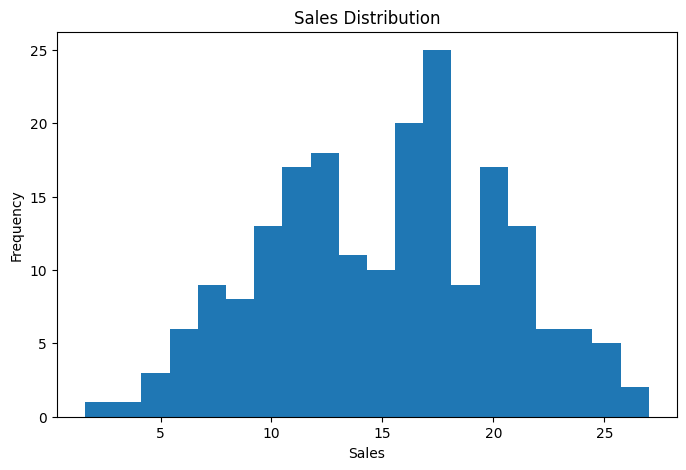

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Sales"], bins=20)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


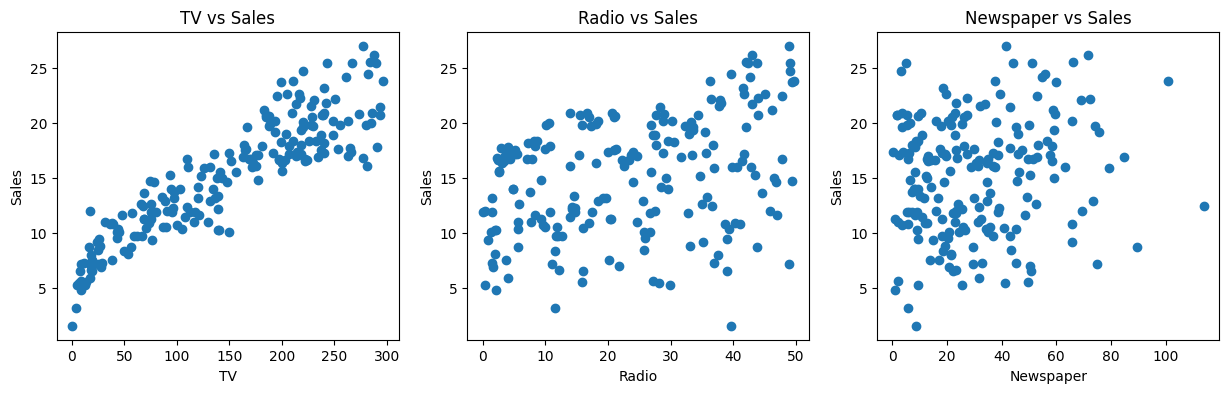

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(df["TV"], df["Sales"])
plt.title("TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")

plt.subplot(1,3,2)
plt.scatter(df["Radio"], df["Sales"])
plt.title("Radio vs Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")

plt.subplot(1,3,3)
plt.scatter(df["Newspaper"], df["Sales"])
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")

plt.show()

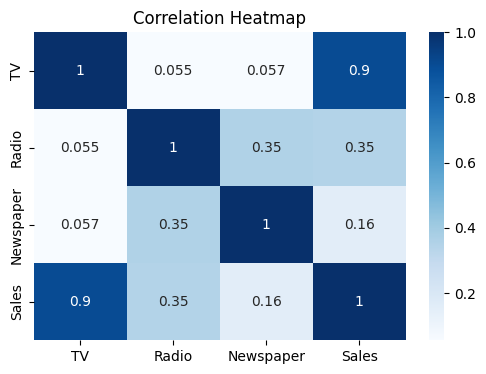

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X = df[["TV", "Radio", "Newspaper"]]

y = df["Sales"]

X.head(), y.head()


(      TV  Radio  Newspaper
 0  230.1   37.8       69.2
 1   44.5   39.3       45.1
 2   17.2   45.9       69.3
 3  151.5   41.3       58.5
 4  180.8   10.8       58.4,
 0    22.1
 1    10.4
 2    12.0
 3    16.5
 4    17.9
 Name: Sales, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred[:10]  # see first 10 predictions


array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


(1.2748262109549338,
 2.9077569102710896,
 np.float64(1.7052146229349223),
 0.9059011844150826)

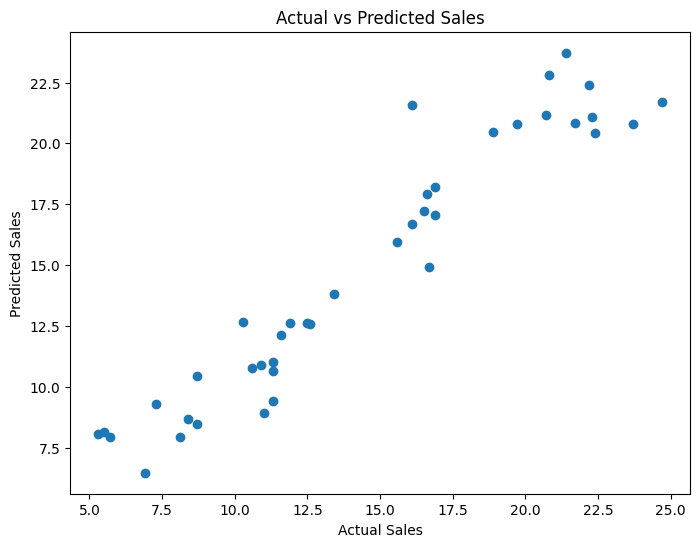

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


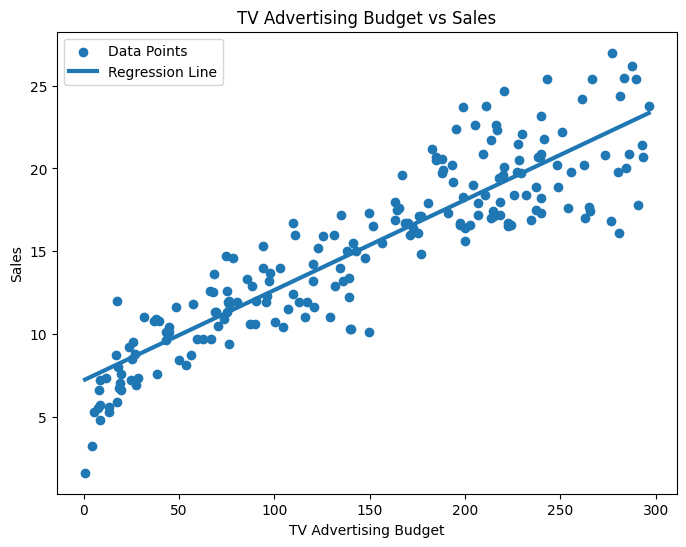

In [ ]:
import numpy as np


tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 100)

radio_mean = df['Radio'].mean()
news_mean = df['Newspaper'].mean()

X_line = np.column_stack((tv_range,
                          np.full(100, radio_mean),
                          np.full(100, news_mean)))

sales_pred_line = model.predict(X_line)

plt.figure(figsize=(8,6))
plt.scatter(df['TV'], df['Sales'], label="Data Points")
plt.plot(tv_range, sales_pred_line, label="Regression Line", linewidth=3)
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV Advertising Budget vs Sales")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


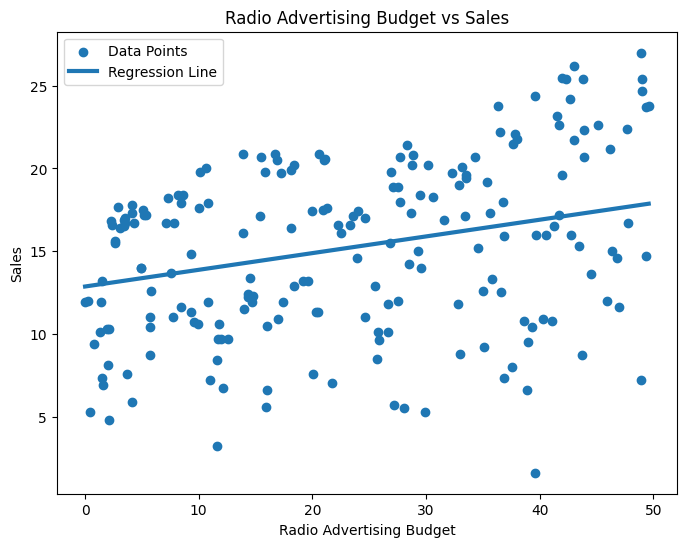

In [ ]:
radio_range = np.linspace(df['Radio'].min(), df['Radio'].max(), 100)

tv_mean = df['TV'].mean()
news_mean = df['Newspaper'].mean()

X_radio = np.column_stack((np.full(100, tv_mean),
                           radio_range,
                           np.full(100, news_mean)))

radio_sales_pred = model.predict(X_radio)

plt.figure(figsize=(8,6))
plt.scatter(df['Radio'], df['Sales'], label="Data Points")
plt.plot(radio_range, radio_sales_pred, label="Regression Line", linewidth=3)
plt.xlabel("Radio Advertising Budget")
plt.ylabel("Sales")
plt.title("Radio Advertising Budget vs Sales")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


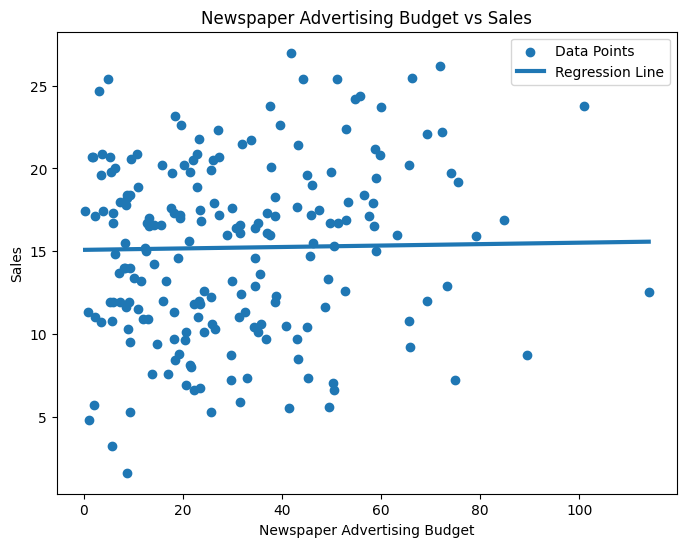

In [ ]:
news_range = np.linspace(df['Newspaper'].min(), df['Newspaper'].max(), 100)

tv_mean = df['TV'].mean()
radio_mean = df['Radio'].mean()

X_news = np.column_stack((np.full(100, tv_mean),
                          np.full(100, radio_mean),
                          news_range))

news_sales_pred = model.predict(X_news)

plt.figure(figsize=(8,6))
plt.scatter(df['Newspaper'], df['Sales'], label="Data Points")
plt.plot(news_range, news_sales_pred, label="Regression Line", linewidth=3)
plt.xlabel("Newspaper Advertising Budget")
plt.ylabel("Sales")
plt.title("Newspaper Advertising Budget vs Sales")
plt.legend()
plt.show()

The sales prediction model successfully provided accurate forecasting results by analyzing historical data and identifying major factors affecting sales. This project highlights the importance of data preprocessing, feature selection, and model evaluation in building reliable predictive systems. The results show how machine learning can effectively assist businesses in planning and improving sales strategies.